In [212]:
#import required contribution
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



In [213]:
#Read the Dataset
df=pd.read_csv("C:/Users/MY COMPUTER/Desktop/COPPER MODELING/Copper modeling dataset.csv",index_col=0)


In [214]:
df.head(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.0


In [215]:
df.shape

(181673, 14)

## Data preprocessing

### Data cleaning

In [216]:
#### missing value handling - yes,it is corrected
#### duplicates - no,there is no duplicate in the data
#### unstructured format - no,it is in stuctered formate
#### outlier correction - 
#### incorrect format - yes,it is corrected

In [217]:
df.isna().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [218]:
df.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [219]:
#correct the data types
df["item_date"]=pd.to_datetime(df["item_date"],format="%Y%m%d",errors="coerce").dt.date
df["quantity tons"]=pd.to_numeric(df["quantity tons"],errors="coerce")
df["material_ref"]=df["material_ref"].apply(lambda x:np.nan if str(x).startswith("0000") else x)
df["delivery date"]=pd.to_datetime(df["delivery date"],format="%Y%m%d",errors="coerce").dt.date

In [220]:
df["quantity tons"]= df["quantity tons"].apply(lambda x: np.nan if x<=0 else x)
df["selling_price"]= df["selling_price"].apply(lambda x: np.nan if x<=0 else x)

In [221]:
#missing value handling

df["item_date"].fillna(df["item_date"].mode().iloc[0],inplace=True)
df["delivery date"].fillna(df["delivery date"].mode().iloc[0],inplace=True)
df["selling_price"].fillna(df["selling_price"].mode().iloc[0],inplace=True)
df["thickness"].fillna(df["thickness"].mean(),inplace=True)
df["application"].fillna(df["application"].mean(),inplace=True)
df["status"].fillna(df["status"].mode().iloc[0],inplace=True)
df["customer"].fillna(df["customer"].mode().iloc[0],inplace=True)
df["quantity tons"].fillna(df["quantity tons"].mean(),inplace=True)
df["country"].fillna(df["country"].mode().iloc[0],inplace=True)
df["id"].fillna(df["id"].mode().iloc[0],inplace=True)
del df["material_ref"]
del df['id']


In [222]:
df['thickness']=abs(df['thickness'])
df['width']=abs(df['width'])

In [223]:
df.isna().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [224]:
df=df.drop_duplicates()

In [225]:
df.shape

(181673, 12)

In [226]:
df.dtypes

item_date         object
quantity tons    float64
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
product_ref        int64
delivery date     object
selling_price    float64
dtype: object

## Encode the data

In [227]:
df['status'].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [228]:
df['status']=df['status'].map({'Won':1, 'Draft':2, 'To be approved':3, 'Lost':0, 'Not lost for AM':4,
       'Wonderful':5, 'Revised':6, 'Offered':7, 'Offerable':8})

In [229]:
df["item type"]=df["item type"].map({'W':1, 'WI':2, 'S':3, 'Others':4, 'PL':5, 'IPL':6, 'SLAWR':7})

In [230]:
df.isna().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [231]:
#Before skewness handling

def plot(df,column):

    df[column].replace([np.inf, -np.inf], np.nan, inplace=True)
    df[column].dropna(inplace=True)
    
    plt.figure(figsize=(15,4))
    plt.subplot(1,3,1)
    sns.distplot(df[column])
    plt.title("distplot for"+" "+column)

    #histogram plot

    plt.subplot(1,3,2)
    sns.histplot(df, x= column, kde= True, bins=30,color="salmon")
    plt.title("histogram plot for"+" "+column)

    #boxplot

    plt.subplot(1,3,3)
    sns.boxplot(df, x=column)
    plt.title("Box plot for"+" "+column)


In [232]:
skewedcolumns=['quantity tons', 'customer', 'country',
       'application', 'thickness', 'width', 'product_ref',
       'selling_price']

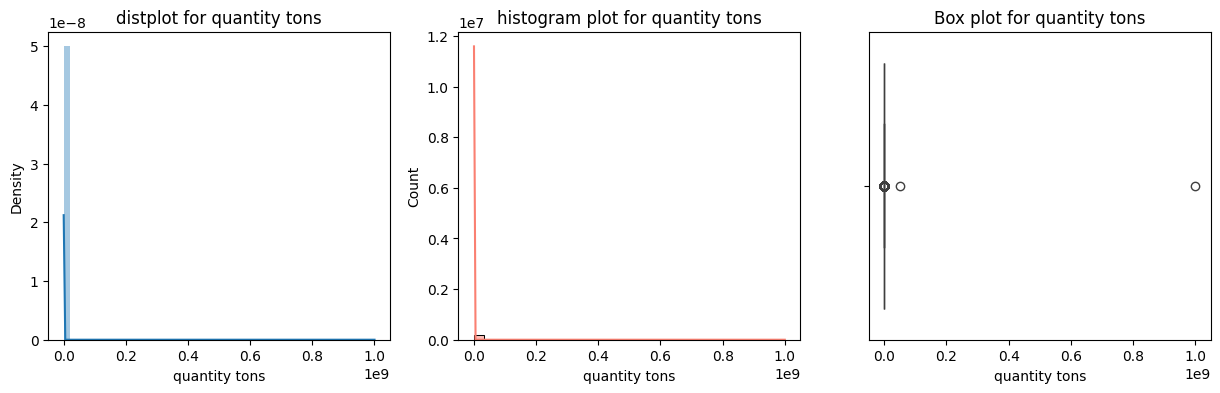

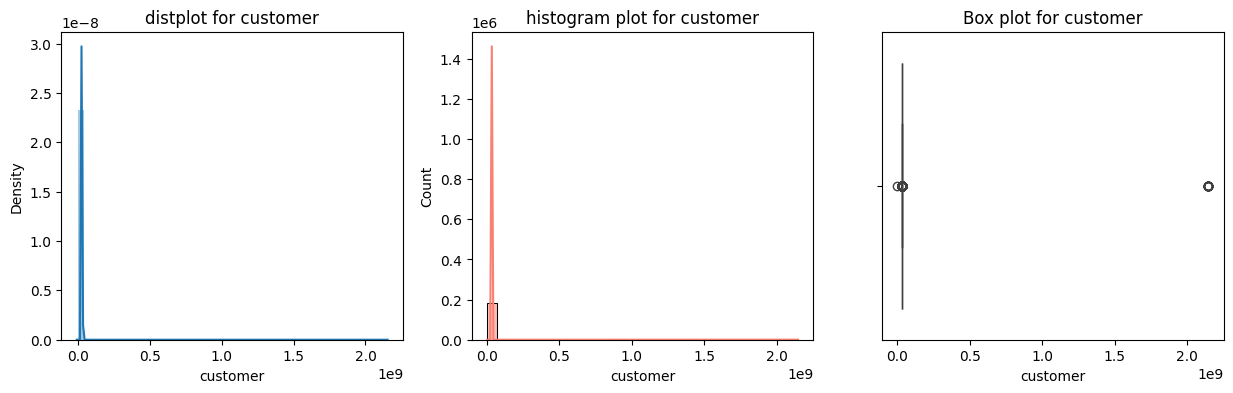

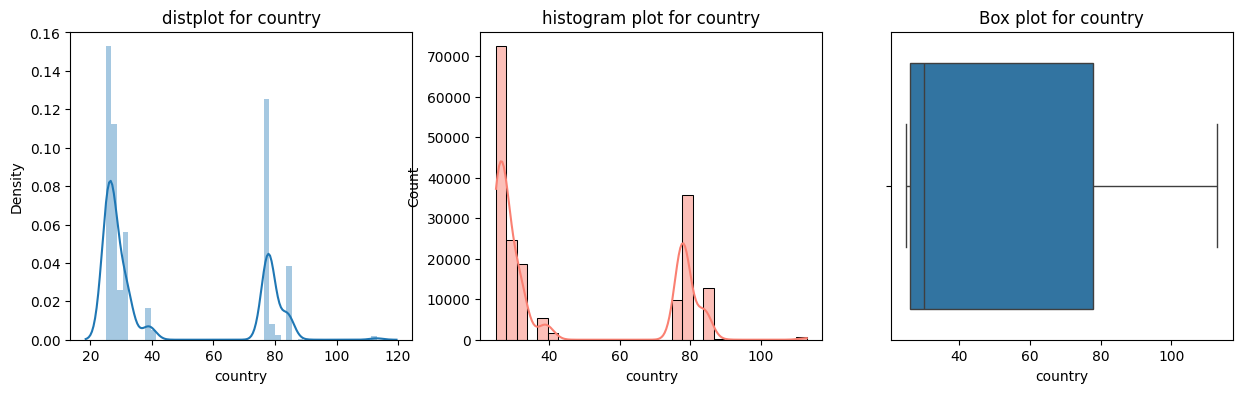

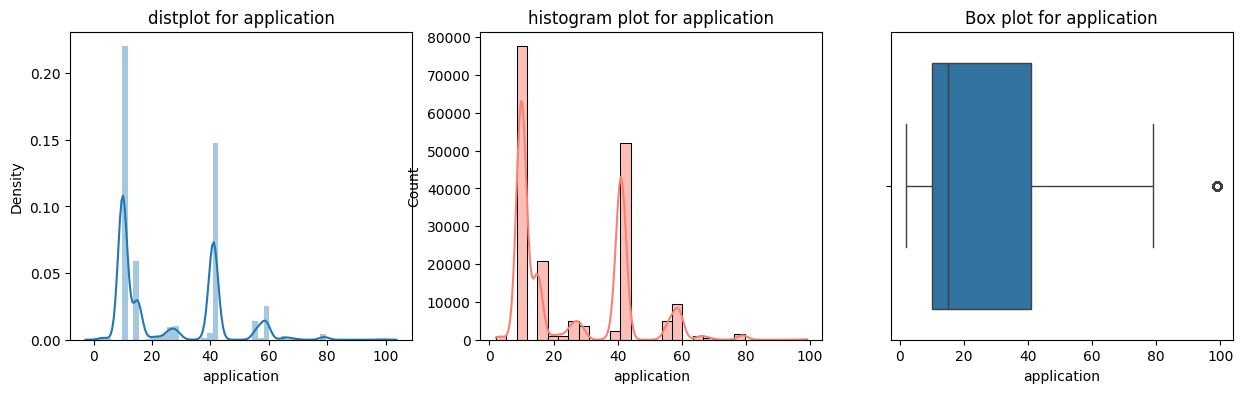

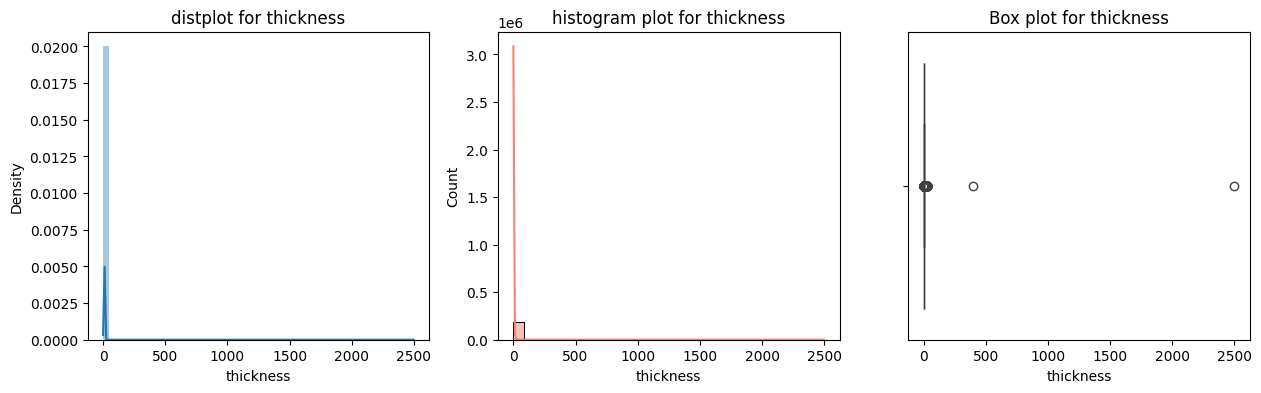

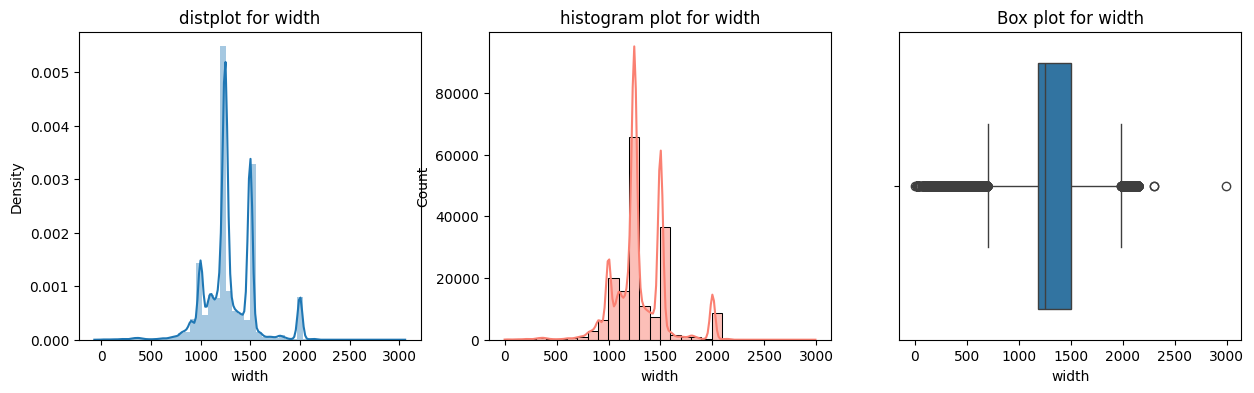

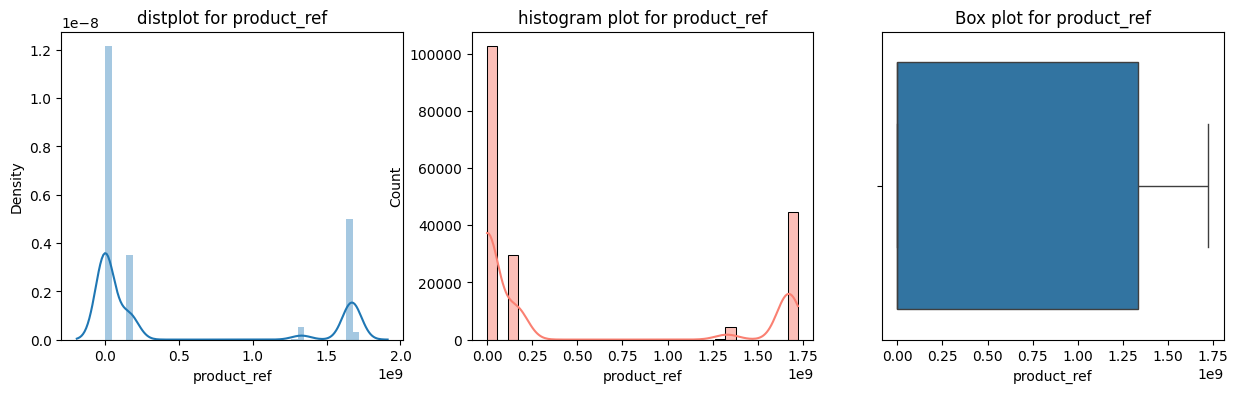

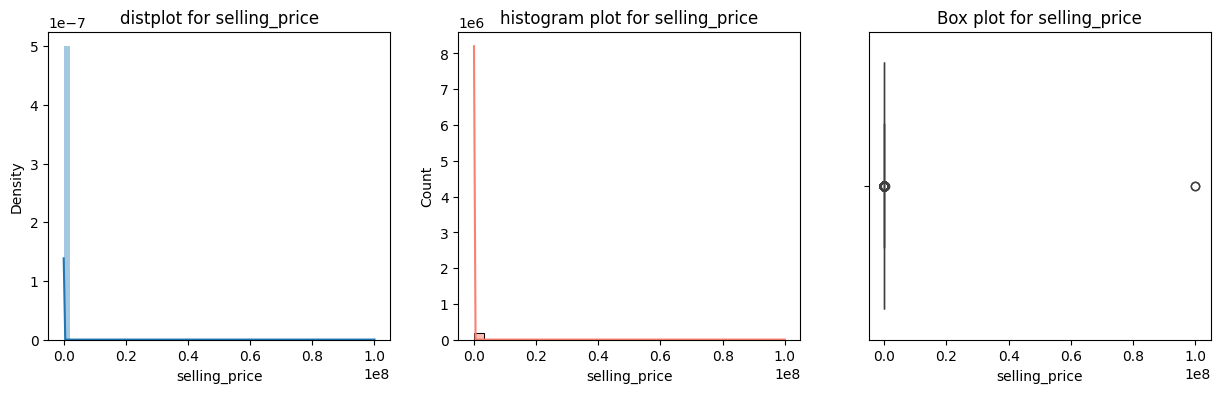

In [233]:
for i in skewedcolumns:
    plot(df,i)

In [234]:
#Skewed columns:
# 1.quantity tons
# 2.customer
# 3.thickness
# 4.selling_price

In [235]:
#Logarithmic Transformation
df["quantity tons"]= np.log(df["quantity tons"])
df["customer"]= np.log(df["customer"])
df["thickness"]= np.log(df["thickness"])
df["selling_price"]= np.log(df["selling_price"])

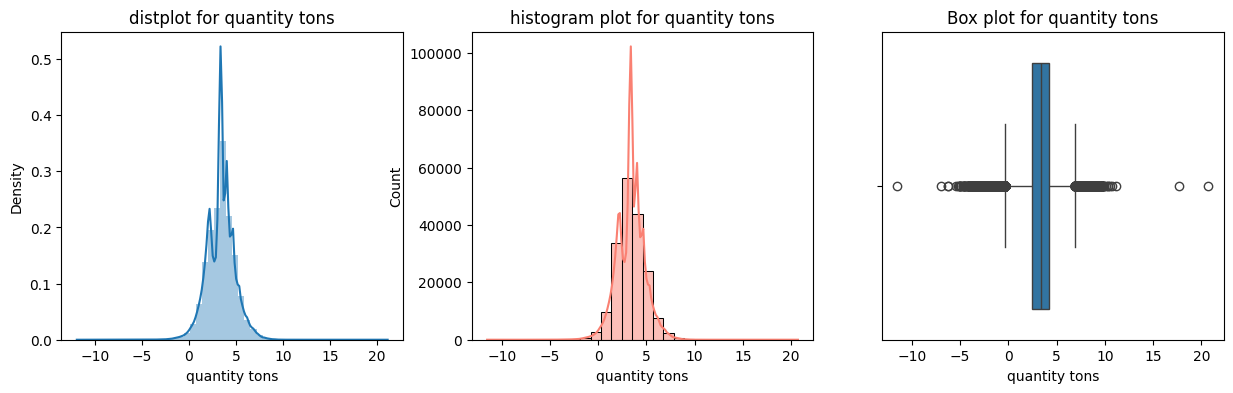

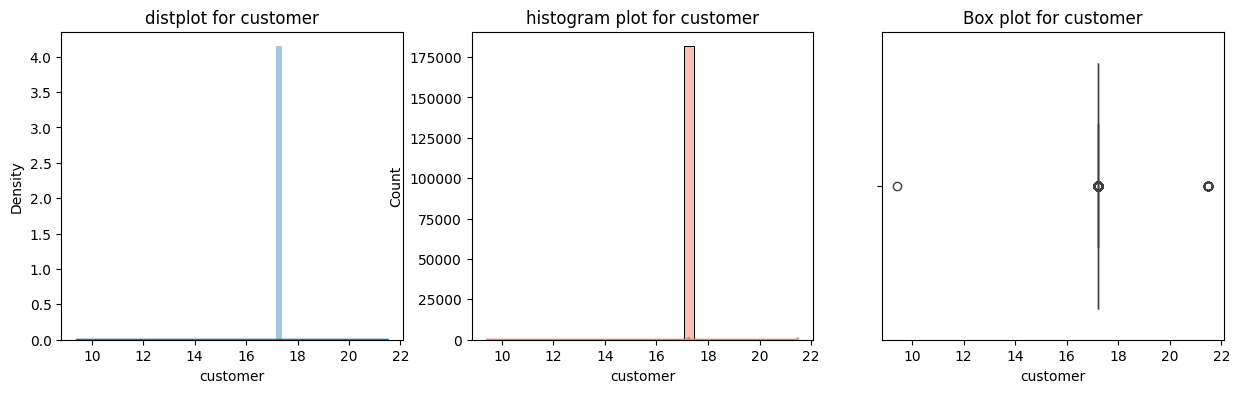

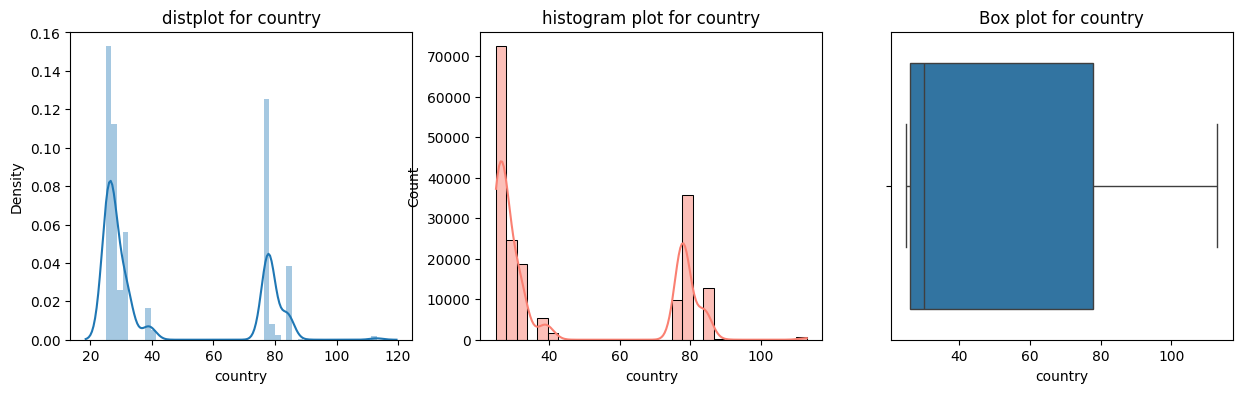

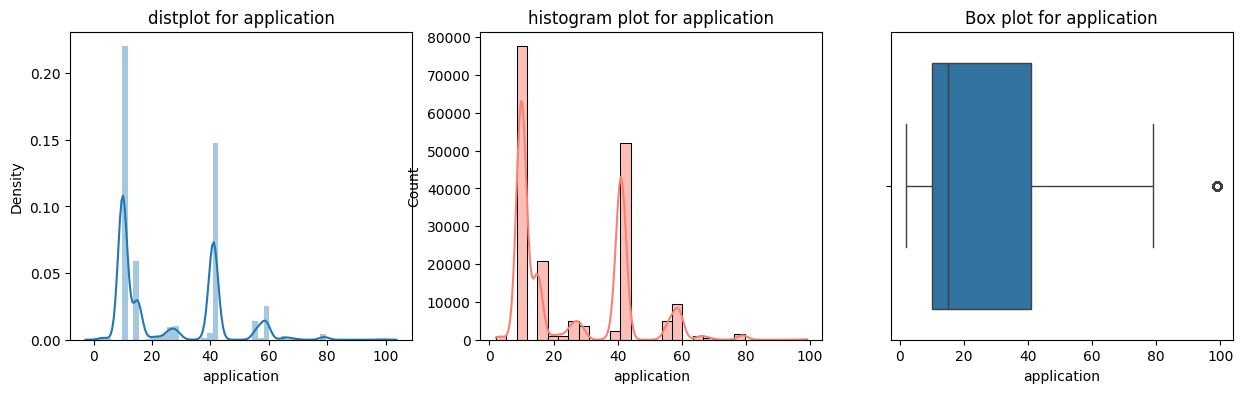

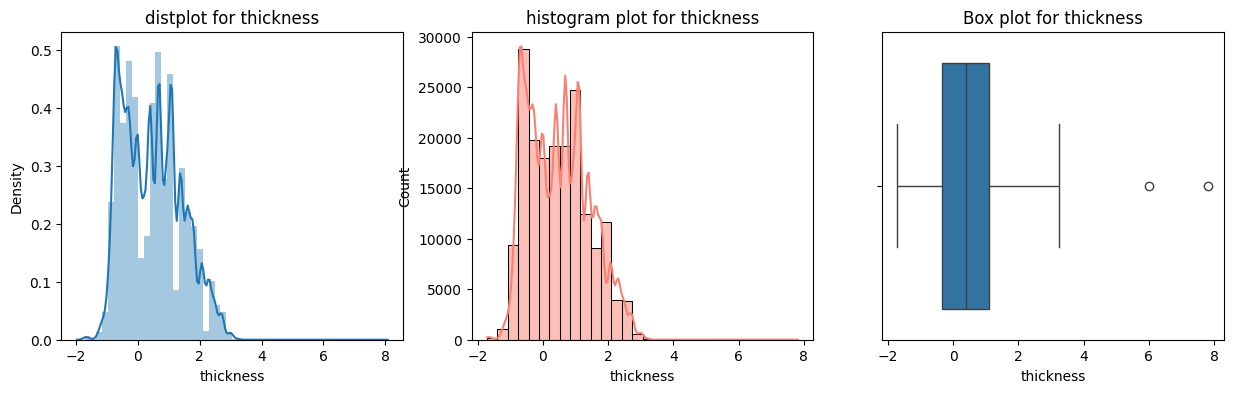

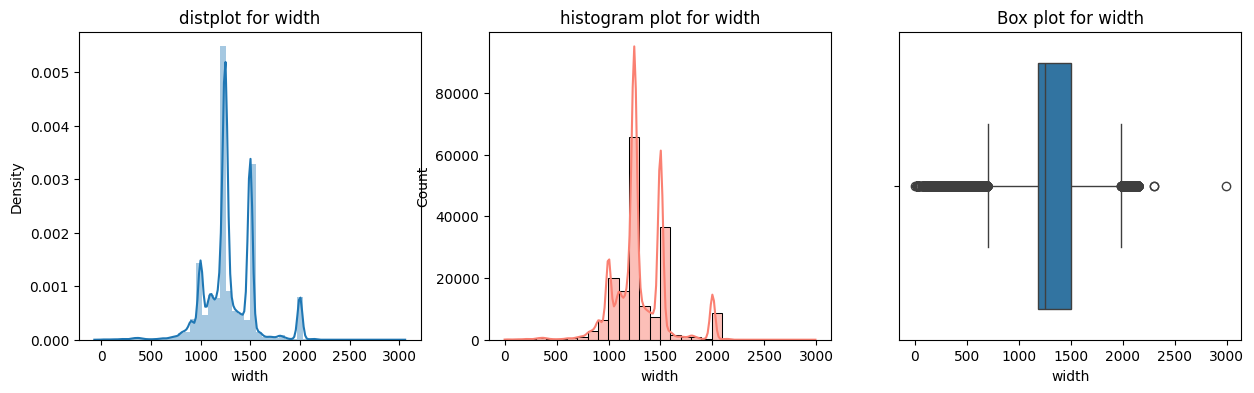

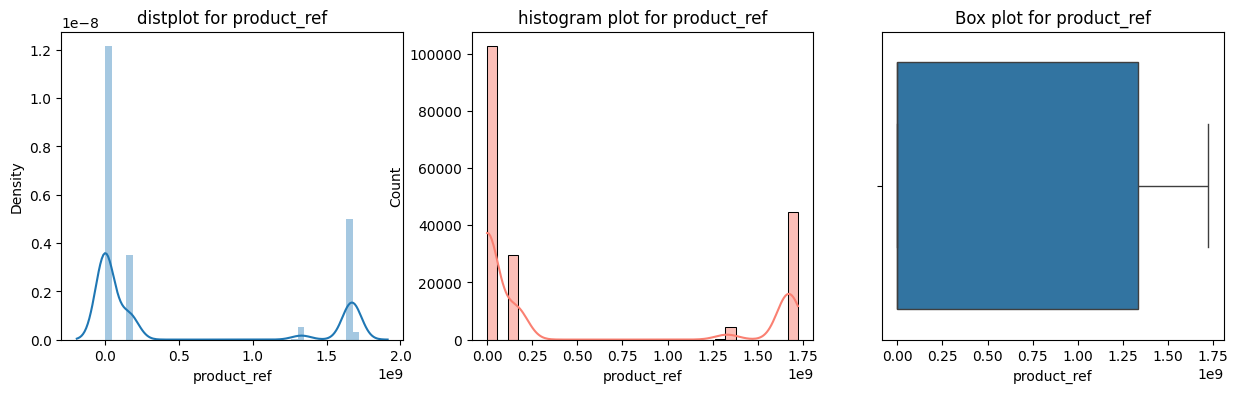

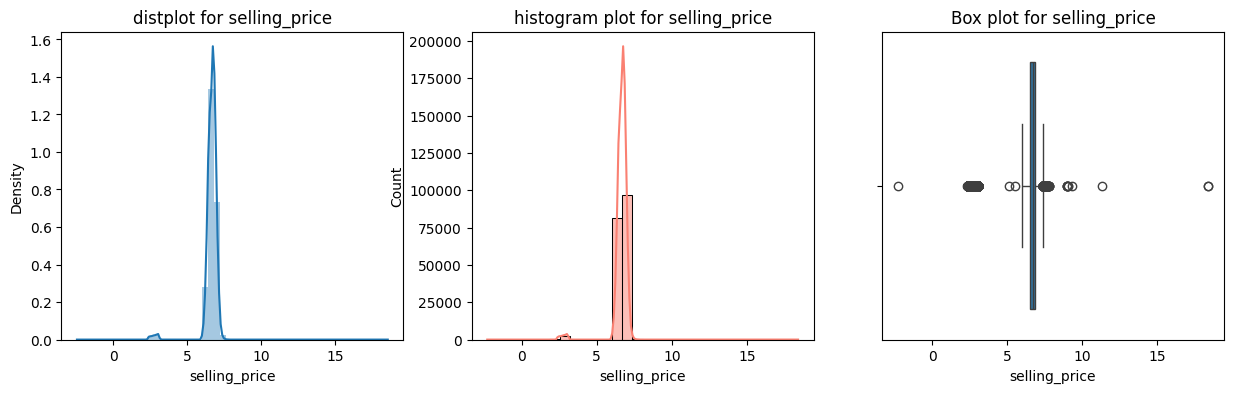

In [236]:
#after skewness handling:
for i in skewedcolumns:
    plot(df,i)

In [237]:
df.isna().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [238]:
df.head(10)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,3.991779,17.221905,28.0,1,1,10.0,0.693147,1500.0,1670798778,2021-07-01,6.749931
1,2021-04-01,6.643822,17.223450,25.0,1,1,41.0,-0.223144,1210.0,1668701718,2021-04-01,6.953684
2,2021-04-01,5.956169,17.221827,30.0,1,2,28.0,-0.967584,952.0,628377,2021-01-01,6.468211
3,2021-04-01,5.310301,17.228293,32.0,1,3,59.0,0.832909,1317.0,1668701718,2021-01-01,6.643790
4,2021-04-01,6.666354,17.223735,28.0,1,1,10.0,1.386294,2000.0,640665,2021-03-01,6.357842
5,2021-04-01,5.419608,17.223450,25.0,1,1,41.0,0.405465,1265.0,1668701718,2021-04-01,6.890609
6,2021-04-01,1.259203,17.223667,30.0,2,1,41.0,-0.967584,1125.0,611993,2021-07-01,2.890372
7,2021-04-01,4.730808,17.228050,32.0,1,1,41.0,-0.385662,1220.0,611993,2021-01-01,6.836259
8,2021-04-01,4.235147,17.228025,38.0,1,3,10.0,-0.510826,1275.0,1668701376,2021-07-01,7.217443
9,2021-04-01,6.446714,17.223450,25.0,1,1,41.0,0.405465,1165.0,1668701718,2021-04-01,6.890609


In [239]:
df.dtypes

item_date         object
quantity tons    float64
customer         float64
country          float64
status             int64
item type          int64
application      float64
thickness        float64
width            float64
product_ref        int64
delivery date     object
selling_price    float64
dtype: object

## Outlier correction

In [240]:
for col in ['quantity tons','customer','country','application','thickness','width','selling_price']:
  iqr: float = df[col].quantile(0.75) - df[col].quantile(0.25)
  upper_threshold: float = df[col].quantile(0.75) + (1.5 * iqr)
  lower_threshold: float = df[col].quantile(0.25) - (1.5 * iqr)
  df[col] = df[col].clip(lower_threshold, upper_threshold)

## Exploratory Data analysis(EDA)

,quantity tons,selling_price
quantity tons,1.000000,-0.031355
selling_price,-0.031355,1.000000


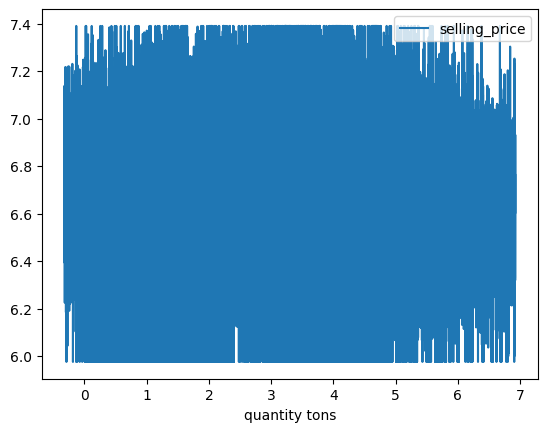

In [241]:
df.groupby("quantity tons")["selling_price"].mean().reset_index().plot.line(x="quantity tons",y="selling_price")
df.groupby("quantity tons")["selling_price"].mean().reset_index().corr()


,customer,selling_price
customer,1.000000,0.073376
selling_price,0.073376,1.000000


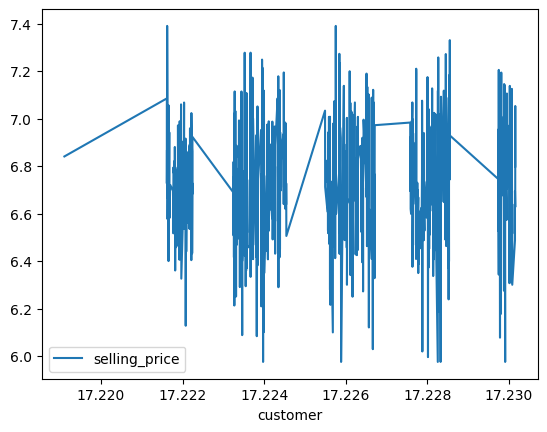

In [242]:
df.groupby("customer")["selling_price"].mean().reset_index().plot.line(x="customer",y="selling_price")
df.groupby("customer")["selling_price"].mean().reset_index().corr()


,country,selling_price
country,1.000000,0.181403
selling_price,0.181403,1.000000


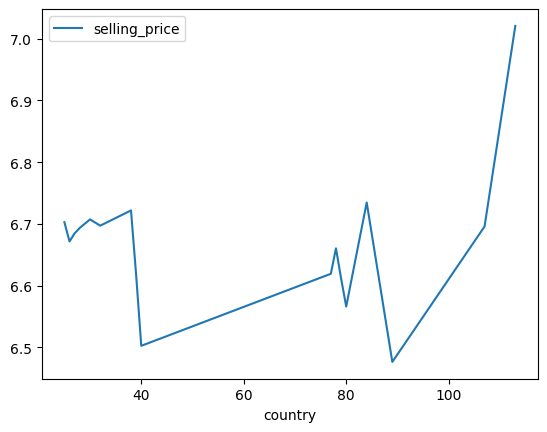

In [243]:
df.groupby("country")["selling_price"].mean().reset_index().plot.line(x="country",y="selling_price")
df.groupby("country")["selling_price"].mean().reset_index().corr()

,status,selling_price
status,1.00000,0.47735
selling_price,0.47735,1.00000


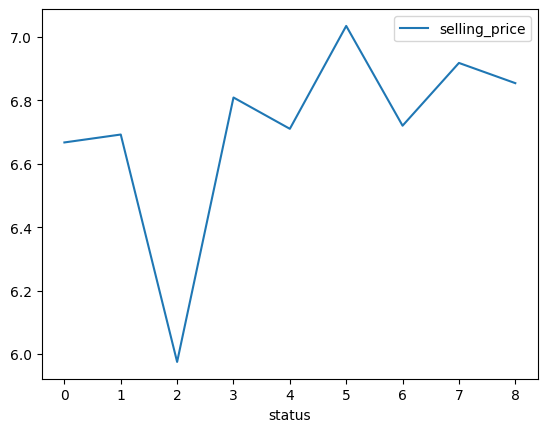

In [244]:
df.groupby("status")["selling_price"].mean().reset_index().plot.line(x="status",y="selling_price")
df.groupby("status")["selling_price"].mean().reset_index().corr()

,item type,selling_price
item type,1.000000,0.540576
selling_price,0.540576,1.000000


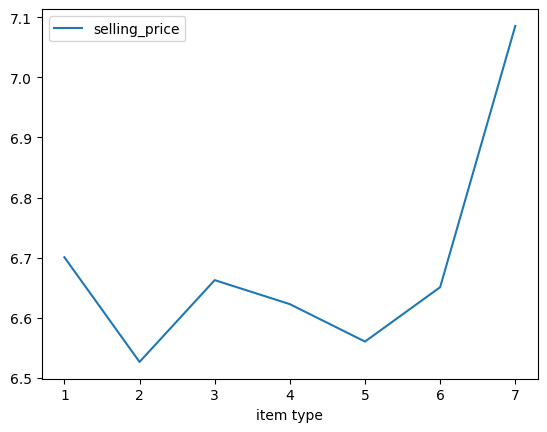

In [245]:
df.groupby("item type")["selling_price"].mean().reset_index().plot.line(x="item type",y="selling_price")
df.groupby("item type")["selling_price"].mean().reset_index().corr()

,application,selling_price
application,1.000000,0.138601
selling_price,0.138601,1.000000


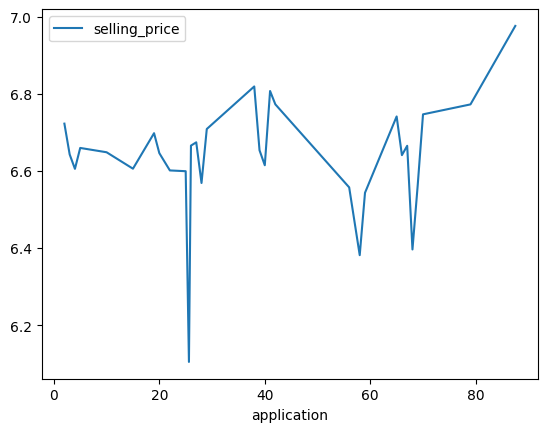

In [246]:
df.groupby("application")["selling_price"].mean().reset_index().plot.line(x="application",y="selling_price")
df.groupby("application")["selling_price"].mean().reset_index().corr()

In [247]:
df.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price'],
      dtype='object')

,thickness,selling_price
thickness,1.000000,-0.594862
selling_price,-0.594862,1.000000


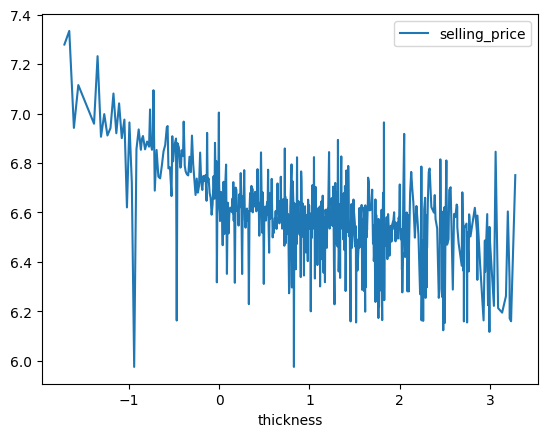

In [248]:
df.groupby("thickness")["selling_price"].mean().reset_index().plot.line(x="thickness",y="selling_price")
df.groupby("thickness")["selling_price"].mean().reset_index().corr()

,width,selling_price
width,1.000000,-0.440143
selling_price,-0.440143,1.000000


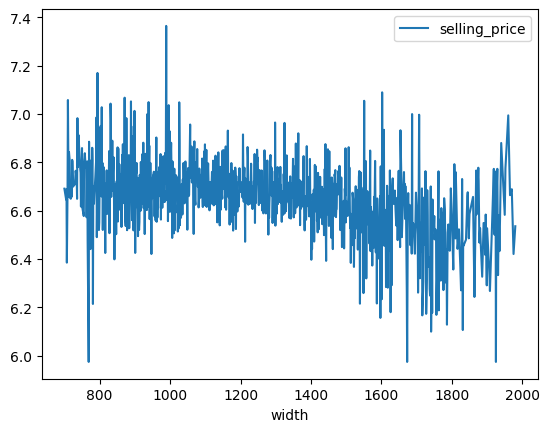

In [249]:
df.groupby("width")["selling_price"].mean().reset_index().plot.line(x="width",y="selling_price")
df.groupby("width")["selling_price"].mean().reset_index().corr()

,product_ref,selling_price
product_ref,1.000000,-0.133373
selling_price,-0.133373,1.000000


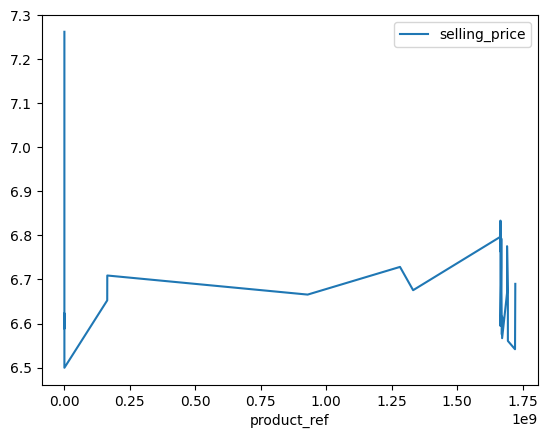

In [250]:
df.groupby("product_ref")["selling_price"].mean().reset_index().plot.line(x="product_ref",y="selling_price")
df.groupby("product_ref")["selling_price"].mean().reset_index().corr()

In [251]:
df.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price'],
      dtype='object')

In [252]:
df1=df.copy()

In [253]:
df["delivery date_1"]= pd.to_datetime(df["delivery date"])
df["item_date_1"]= pd.to_datetime(df["item_date"])

In [254]:

#identifying the difference of the "delivery date" and the "item date"
df["date_differ"]= (df["delivery date_1"]-df["item_date_1"]).dt.days

In [255]:
df["date_differ"]=abs(df["date_differ"])

In [256]:
df.dtypes


item_date                  object
quantity tons             float64
customer                  float64
country                   float64
status                      int64
item type                   int64
application               float64
thickness                 float64
width                     float64
product_ref                 int64
delivery date              object
selling_price             float64
delivery date_1    datetime64[ns]
item_date_1        datetime64[ns]
date_differ                 int64
dtype: object

In [257]:
del df['item_date']
del df["delivery date"]
del df['quantity tons']
del df['delivery date_1']
del df["country"]
del df['item_date_1']

In [258]:
df.head()

,customer,status,item type,application,thickness,width,product_ref,selling_price,date_differ
0,17.221905,1,1,10.0,0.693147,1500.0,1670798778,6.749931,91
1,17.223450,1,1,41.0,-0.223144,1210.0,1668701718,6.953684,0
2,17.221827,1,2,28.0,-0.967584,952.0,628377,6.468211,90
3,17.228293,1,3,59.0,0.832909,1317.0,1668701718,6.643790,90
4,17.223735,1,1,10.0,1.386294,1980.0,640665,6.357842,31


In [259]:
df.columns

Index(['customer', 'status', 'item type', 'application', 'thickness', 'width',
       'product_ref', 'selling_price', 'date_differ'],
      dtype='object')

## spliting the data

In [260]:
from sklearn.model_selection import train_test_split
X = df.loc[:, list(df.columns)[:-2]+["date_differ"]]
y = df.loc[:, 'selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 7)

## scaling

In [261]:
# scaling is not mandatory

## Linear Regression

In [262]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()
model.fit(X_train,y_train)
print(f"Test data accuracy : {model.score(X_test, y_test)}")

Test data accuracy : 0.29842038539229343


## DecisionTree Regression

In [263]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

for depth in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]:
  model = DecisionTreeRegressor(max_depth = depth)
  model.fit(X_train,y_train)
  train_score = model.score(X_train,y_train)
  cross_val=np.mean(cross_val_score(model,X_train,y_train,cv=30))
  print(f"Depth-{depth},Train_score-{train_score},Cross_val-{cross_val}")

Depth-1,Train_score-0.22141940263970816,Cross_val-0.2212413453039934
Depth-2,Train_score-0.3311113687239574,Cross_val-0.3306389991114004
Depth-3,Train_score-0.371402533093229,Cross_val-0.37309620038268393
Depth-4,Train_score-0.4820712441652677,Cross_val-0.48133870316471455
Depth-5,Train_score-0.545356732557792,Cross_val-0.5470675149817702
Depth-6,Train_score-0.5696736507409146,Cross_val-0.5690206506742739
Depth-7,Train_score-0.5910276850989167,Cross_val-0.5899523114439658
Depth-8,Train_score-0.6166306915543984,Cross_val-0.6145365442515243
Depth-9,Train_score-0.6492272544738635,Cross_val-0.6423570686954779
Depth-10,Train_score-0.6824438959355068,Cross_val-0.6719731030556892
Depth-11,Train_score-0.7194918071520203,Cross_val-0.7017472299554199
Depth-12,Train_score-0.7538945922195815,Cross_val-0.7303678480294171
Depth-13,Train_score-0.7875036199090467,Cross_val-0.7573438646094743
Depth-14,Train_score-0.8226445016886151,Cross_val-0.7823800560551558
Depth-15,Train_score-0.8528395748852067,Cr

In [264]:
from sklearn.metrics import r2_score
model = DecisionTreeRegressor(max_depth = 23)
model.fit(X_train, y_train)
print(f"Test data accuracy : {model.score(X_test, y_test)}, r2-Score: {r2_score(model.predict(X_test), y_test)}")

Test data accuracy : 0.864568242858698, r2-Score: 0.8618196166078554


## RandomForest Regression

In [265]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(max_depth = 23, max_features = "sqrt")

for n in [10, 20, 50]:
  model = RandomForestRegressor(n_estimators = n, max_depth = 23, max_features = "sqrt")
  cross_score = np.mean(cross_val_score(model, X_train, y_train, cv = 25))
  print(f"N: {n}, Cross-Val Score: {cross_score}")

N: 10, Cross-Val Score: 0.8744727682825535
N: 20, Cross-Val Score: 0.882038921270635
N: 50, Cross-Val Score: 0.8871775795899591


In [266]:
model = RandomForestRegressor(n_estimators = 50, max_depth = 23, max_features = "sqrt")
model.fit(X_train, y_train)
print(f"Test data accuracy : {model.score(X_test, y_test)}, r2-Score: {r2_score(model.predict(X_test), y_test)}")

Test data accuracy : 0.8883190956188638, r2-Score: 0.8597871386778307


## XGBOOSTER

In [267]:
from xgboost import XGBRegressor

for lamb in [0.001, 0.002, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02, 0.05, 0.1, 0.2, 0.5, 1]:
  model = XGBRegressor(learning_rate = lamb)
  cross_score = np.mean(cross_val_score(model, X_train, y_train, cv = 10))
  print(f"Lambda: {lamb}, Cross-Val Score: {cross_score}")

Lambda: 0.001, Cross-Val Score: 0.10330005790506194
Lambda: 0.002, Cross-Val Score: 0.1883140150614307
Lambda: 0.005, Cross-Val Score: 0.3663493001664323
Lambda: 0.006, Cross-Val Score: 0.4067026395087893
Lambda: 0.007, Cross-Val Score: 0.44036073767629613
Lambda: 0.008, Cross-Val Score: 0.46904074053075034
Lambda: 0.009, Cross-Val Score: 0.49377962142052584
Lambda: 0.01, Cross-Val Score: 0.5152176546116236
Lambda: 0.011, Cross-Val Score: 0.533286965866921
Lambda: 0.012, Cross-Val Score: 0.5490135033251502
Lambda: 0.013, Cross-Val Score: 0.5629254675925793
Lambda: 0.014, Cross-Val Score: 0.5753705649996406
Lambda: 0.015, Cross-Val Score: 0.5862517565025308
Lambda: 0.016, Cross-Val Score: 0.5958445407594798
Lambda: 0.017, Cross-Val Score: 0.6045204417219789
Lambda: 0.018, Cross-Val Score: 0.6124161820741885
Lambda: 0.019, Cross-Val Score: 0.6192038534530486
Lambda: 0.02, Cross-Val Score: 0.6255750275291637
Lambda: 0.05, Cross-Val Score: 0.7088954898648994
Lambda: 0.1, Cross-Val Score: 0

In [268]:
model = XGBRegressor(learning_rate = 0.5)
model.fit(X_train, y_train)
print(f"Test data accuracy : {model.score(X_test, y_test)}, r2-Score: {r2_score(model.predict(X_test), y_test)}")

Test data accuracy : 0.8374124062476083, r2-Score: 0.7981911998115259


## Again split the model for Classification ML Algorithm

In [269]:
df_class= df.copy()

In [270]:
# filter the status column only want to be a (won& loss)
df_c= df_class[(df_class["status"] == 1) | (df_class["status"] == 0)]

In [271]:
df_c.tail()

,customer,status,item type,application,thickness,width,product_ref,selling_price,date_differ
181668,17.223381,1,1,41.0,-0.040822,1220.0,164141591,6.381816,1
181669,17.223381,1,1,41.0,-0.051293,1500.0,164141591,6.378426,1
181670,17.223381,1,1,41.0,-0.342490,1250.0,164141591,6.428105,1
181671,17.223381,1,1,41.0,-0.162519,1250.0,164141591,6.398595,1
181672,17.223381,1,1,41.0,-0.342490,1240.0,164141591,6.408529,1


In [272]:
df_c["status"].value_counts()
     

status
1    116012
0     34438
Name: count, dtype: int64

In [273]:
df_c.columns

Index(['customer', 'status', 'item type', 'application', 'thickness', 'width',
       'product_ref', 'selling_price', 'date_differ'],
      dtype='object')

In [274]:
X= df_c.drop(columns=["status"],axis=1)
y= df_c["status"]

In [275]:

X.shape,y.shape

((150450, 8), (150450,))

In [276]:
from imblearn.combine import SMOTETomek

import pickle
X_new,y_new= SMOTETomek().fit_resample(X,y)

In [277]:
y_new.value_counts()

status
1    113209
0    113209
Name: count, dtype: int64

In [278]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 7)

## Decision Tree classification

In [279]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

for depth in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]:
  model = DecisionTreeClassifier(max_depth = depth)
  model.fit(X_train,y_train)
  train_score = model.score(X_train,y_train)
  cross_val=np.mean(cross_val_score(model,X_train,y_train,cv=30))
  print(f"Depth-{depth},Train_score-{train_score},Cross_val-{cross_val}")

Depth-1,Train_score-0.770766681141824,Cross_val-0.7707666890806872
Depth-2,Train_score-0.770766681141824,Cross_val-0.7707666890806872
Depth-3,Train_score-0.770766681141824,Cross_val-0.7707844101510398
Depth-4,Train_score-0.7964408837526697,Cross_val-0.7964410073766487
Depth-5,Train_score-0.8012442727119651,Cross_val-0.8008190446896559
Depth-6,Train_score-0.8161950424063029,Cross_val-0.8154063574304549
Depth-7,Train_score-0.8270779974653704,Cross_val-0.8242157342655532
Depth-8,Train_score-0.8389535347448089,Cross_val-0.8364899266717092
Depth-9,Train_score-0.8477095279030814,Cross_val-0.8440317569496539
Depth-10,Train_score-0.8617563387895815,Cross_val-0.8554375368079729
Depth-11,Train_score-0.8755195547559754,Cross_val-0.8664623607716849
Depth-12,Train_score-0.891737639249537,Cross_val-0.8799507433402395
Depth-13,Train_score-0.9071847000540603,Cross_val-0.8928543258753591
Depth-14,Train_score-0.9219316358995719,Cross_val-0.9033561002676159
Depth-15,Train_score-0.9362000053174048,Cross_v

In [280]:
from sklearn.metrics import f1_score
model = DecisionTreeClassifier(max_depth=29)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

test_accuracy = model.score(X_test, y_test)
f1 = f1_score(y_test, y_pred)

print(f"Test data accuracy: {test_accuracy}, F1-Score: {f1}")

Test data accuracy: 0.9449126631749661, F1-Score: 0.9643017125529789


## Randomforest classification

In [281]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth = 29, max_features = "sqrt")

for n in [10, 20, 50]:
  model = RandomForestClassifier(n_estimators = n, max_depth = 27, max_features = "sqrt")
  cross_score = np.mean(cross_val_score(model, X_train, y_train, cv = 25))
  print(f"N: {n}, Cross-Val Score: {cross_score}")

N: 10, Cross-Val Score: 0.947464039542734
N: 20, Cross-Val Score: 0.9526928566821337
N: 50, Cross-Val Score: 0.9547223032442781


In [282]:
model = RandomForestClassifier(n_estimators=50, max_depth=29, max_features="sqrt")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Random Forest Test data accuracy: {model.score(X_test, y_test)}, F1-Score: {f1_score(y_test, y_pred)}")

Random Forest Test data accuracy: 0.9565575731794859, F1-Score: 0.9720052083333334


## XG booster Classification


In [283]:
from xgboost import XGBClassifier

for lamb in [0.001, 0.002, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02, 0.05, 0.1, 0.2, 0.5, 1]:
  model = XGBClassifier(learning_rate = lamb)
  cross_score = np.mean(cross_val_score(model, X_train, y_train, cv = 10))
  print(f"Lambda: {lamb}, Cross-Val Score: {cross_score}")

Lambda: 0.001, Cross-Val Score: 0.7707666821775113
Lambda: 0.002, Cross-Val Score: 0.7707666821775113
Lambda: 0.005, Cross-Val Score: 0.7762347670826883
Lambda: 0.006, Cross-Val Score: 0.7817471609451694
Lambda: 0.007, Cross-Val Score: 0.7831119322821084
Lambda: 0.008, Cross-Val Score: 0.8011113683684895
Lambda: 0.009, Cross-Val Score: 0.8059501825092651
Lambda: 0.01, Cross-Val Score: 0.8086443450937708
Lambda: 0.011, Cross-Val Score: 0.813243935792203
Lambda: 0.012, Cross-Val Score: 0.8159646729120358
Lambda: 0.013, Cross-Val Score: 0.8186499749617828
Lambda: 0.014, Cross-Val Score: 0.8221506150786713
Lambda: 0.015, Cross-Val Score: 0.8234267991331145
Lambda: 0.016, Cross-Val Score: 0.825021999354495
Lambda: 0.017, Cross-Val Score: 0.8261475142606619
Lambda: 0.018, Cross-Val Score: 0.8277693165077269
Lambda: 0.019, Cross-Val Score: 0.8289923271429134
Lambda: 0.02, Cross-Val Score: 0.8304014427819011
Lambda: 0.05, Cross-Val Score: 0.8502974299532353
Lambda: 0.1, Cross-Val Score: 0.8742

In [284]:
model = XGBClassifier(learning_rate = 1)
model.fit(X_train, y_train)
print(f"Test data accuracy : {model.score(X_test, y_test)}, F1-Score: {f1_score(model.predict(X_test), y_test)}")

Test data accuracy : 0.9383723712546194, F1-Score: 0.9602169361205506


In [285]:
# Evalution Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[ 7612   960]
 [  674 28367]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      8572
           1       0.97      0.98      0.97     29041

    accuracy                           0.96     37613
   macro avg       0.94      0.93      0.94     37613
weighted avg       0.96      0.96      0.96     37613



#### Based on Evaluation of Ml Algorithm 
#### For Regession ----> Randomforest Regression Algorithm is the best model
#### For Classification ----> Randomforest Classification Algorithm is the best model

In [286]:

# pass the parameters and check the accuracy for both training and testing & overfitting

x = df.drop(columns=['selling_price'], axis=1)
y = df['selling_price']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=7)

model_r = RandomForestRegressor(max_depth=29, max_features=None, min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred_train = model_r.predict(x_train)
y_pred_test = model_r.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
r2_train, r2_test

(0.9769262880343568, 0.9155296136507083)

In [287]:
#predict the selling price with hypertuning parameters and calculate the accuracy using metrics
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,root_mean_squared_error

x = df.drop(columns=['selling_price'], axis=1)
y = df['selling_price']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model_r = RandomForestRegressor(max_depth=29, max_features=None, min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred = model_r.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

metrics_r = {'R2': r2,
           'Mean Absolute Error': mae,
           'Mean Squared Error': mse,
           'Root Mean Squared Error': rmse}


In [288]:
metrics_r

{'R2': 0.9190581365169731,
 'Mean Absolute Error': 0.04363692721600491,
 'Mean Squared Error': 0.005252756098115692,
 'Root Mean Squared Error': 0.07247590011938929}

In [289]:
user_data = np.array([[17.223450,1,1,41.0,-0.223144,1210.0,1668701718,0]])
y_pred = model_r.predict(user_data)
print("Predicted selling price with Log: ",y_pred[0])
print("Predicted selling price without Log: ",np.exp(y_pred[0]))

Predicted selling price with Log:  6.919656614542558
Predicted selling price without Log:  1011.972438246817


In [290]:
import pickle
     

with open("Regression_Model.pkl","wb") as r:
  pickle.dump(model_r,r)
     

with open("Regression_Model.pkl","rb") as r1:
  regg_model=pickle.load(r1)

In [291]:

user_data = np.array([[17.221905,1,	1,10.0,0.693147,1500.0,167079877,91]])
y_pred = regg_model.predict(user_data)
print("Predicted selling price with Log: ",y_pred[0])
print("Predicted selling price without Log: ",np.exp(y_pred[0]))

Predicted selling price with Log:  6.812843068155029
Predicted selling price without Log:  909.4527710703422


## Classification model Prediction

In [292]:
x = df_c.drop(columns=['status'], axis=1)
y = df_c['status']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=7)

model_c= RandomForestClassifier(n_estimators=50, max_depth=29, max_features="sqrt")
model_c.fit(X_train, y_train)
y_pred_train = model_c.predict(x_train)
y_pred_test = model_c.predict(x_test)

f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)
f1_train, f1_test


(0.9997298027560119, 0.9714922048997773)

In [293]:
model_c= RandomForestClassifier(n_estimators=50, max_depth=29, max_features="sqrt")
model_c.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Random Forest Test data accuracy: {model.score(X_test, y_test)}, F1-Score: {f1_score(y_test, y_pred)}")


Random Forest Test data accuracy: 0.9383723712546194, F1-Score: 0.9602169361205506


In [294]:
user_data = np.array([[17.221905,1,10.0,0.693147,1500.0,1670798778,6.749931,91]])
y_pred = model_c.predict(user_data)
if y_pred==1:
    print('The status is: Won')
else:
    print('The status is: Lost')

The status is: Won


In [295]:
import pickle
     

with open("Classification_Model.pkl","wb") as r:
  pickle.dump(model_c,r)
     

with open("Classification_Model.pkl","rb") as r1:
  class_model=pickle.load(r1)

In [296]:
user_data = np.array([[17.221905,1,10.0,0.693147,1500.0,167079877,6.408529,1]])
y_pred = class_model.predict(user_data)
if y_pred==1:
    print('The status is: Won')
else:
    print('The status is: Lost')

The status is: Won


In [297]:
df_c.tail()

,customer,status,item type,application,thickness,width,product_ref,selling_price,date_differ
181668,17.223381,1,1,41.0,-0.040822,1220.0,164141591,6.381816,1
181669,17.223381,1,1,41.0,-0.051293,1500.0,164141591,6.378426,1
181670,17.223381,1,1,41.0,-0.342490,1250.0,164141591,6.428105,1
181671,17.223381,1,1,41.0,-0.162519,1250.0,164141591,6.398595,1
181672,17.223381,1,1,41.0,-0.342490,1240.0,164141591,6.408529,1


In [316]:
df_c.columns

Index(['customer', 'status', 'item type', 'application', 'thickness', 'width',
       'product_ref', 'selling_price', 'date_differ'],
      dtype='object')

In [317]:
df.columns

Index(['customer', 'status', 'item type', 'application', 'thickness', 'width',
       'product_ref', 'selling_price', 'date_differ'],
      dtype='object')

In [320]:
df_c["product_ref"].unique()

array([1670798778, 1668701718,     628377,     640665,     611993,
       1668701376,  164141591, 1671863738, 1332077137,     640405,
       1693867550, 1665572374, 1282007633, 1668701698,     628117,
       1690738206,     628112,     640400, 1671876026,  164336407,
       1665572032,  164337175,     611728, 1721130331, 1693867563,
           611733, 1690738219, 1722207579,  929423819, 1668701725,
       1665584320, 1665584642], dtype=int64)